In [121]:

#cargamos las bibliotecas a utilizar y asignamos nombres cortos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates


In [122]:
meteo=pd.read_excel('meteo.xlsx')

In [123]:
meteo.head()

,DATE,TIME,N,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,2009-01-01,00:10:00,1.0,NaN,1.215,0.506,-0.044,10.95,1.159,-176.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,00:20:00,1.0,NaN,0.892,0.588,-0.072,10.81,1.159,-176.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,00:30:00,1.0,NaN,1.227,0.685,-0.069,10.34,1.224,-175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,00:40:00,1.0,NaN,1.135,0.741,-0.093,9.80,1.258,-182.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,00:50:00,1.0,NaN,0.755,1.064,-0.149,8.87,1.332,-184.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
#df=df0(["DATE", "TIME", "Unnamed: 2", "u_Avg","v_Avg", "w_Avg", "t_Avg", "kh20_Avg", "net_rad_Avg", "shf1_Avg","shf2_Avg", "vv_Avg", "airT_Avg", "rh_Avg", "e_sat_Avg", "e_Avg", "h2o_hmp_Avg"])

df0=meteo.drop(meteo.columns[meteo.columns.str.contains('unnamed:',case = False)],axis = 1)
df0.dtypes

DATE           datetime64[ns]
TIME                   object
N                     float64
u_Avg                 float64
v_Avg                  object
w_Avg                 float64
t_Avg                 float64
kh20_Avg               object
net_rad_Avg            object
shf1_Avg               object
shf2_Avg               object
vv_Avg                 object
airT_Avg              float64
rh_Avg                float64
e_sat_Avg             float64
e_Avg                 float64
h2o_hmp_Avg           float64
dtype: object

In [125]:
cols=["N", "u_Avg","v_Avg", "w_Avg", "t_Avg", "kh20_Avg", "net_rad_Avg", "shf1_Avg","shf2_Avg", "vv_Avg", "airT_Avg", "rh_Avg", "e_sat_Avg", "e_Avg", "h2o_hmp_Avg"]
for col in cols:
    df[col]=df[col].astype(dtype=np.float64)
#df["TIME"]=pd.to_datetime(df("TIME"))
df0.dtypes

DATE           datetime64[ns]
TIME                   object
N                     float64
u_Avg                 float64
v_Avg                  object
w_Avg                 float64
t_Avg                 float64
kh20_Avg               object
net_rad_Avg            object
shf1_Avg               object
shf2_Avg               object
vv_Avg                 object
airT_Avg              float64
rh_Avg                float64
e_sat_Avg             float64
e_Avg                 float64
h2o_hmp_Avg           float64
dtype: object

In [126]:
df=df0.loc[0:143]
df.head()

,DATE,TIME,N,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
0,2009-01-01,00:10:00,1.0,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.400000,0.899,1.178,1.059,8.120000
1,2009-01-01,00:20:00,1.0,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.240000,0.896,1.166,1.045,8.020000
2,2009-01-01,00:30:00,1.0,1.227,0.685,-0.069,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001
3,2009-01-01,00:40:00,1.0,1.135,0.741,-0.093,9.80,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737000
4,2009-01-01,00:50:00,1.0,0.755,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.630000,0.859,1.119,0.961,7.390000


In [127]:
soil=pd.read_excel('soil.xlsx')

In [128]:
soil.head()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_20cm.1,THETA_30cm.1,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1
0,147,2009,1,30,0.959,0.972,0.992,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,147,2009,1,100,0.958,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,147,2009,1,130,0.956,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,147,2009,1,200,0.955,0.972,0.993,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,147,2009,1,230,0.953,0.972,0.994,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
df1=soil.loc[0:47]

In [130]:
df1.head()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_20cm.1,THETA_30cm.1,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1
0,147,2009,1,30,0.959,0.972,0.992,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,147,2009,1,100,0.958,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,147,2009,1,130,0.956,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,147,2009,1,200,0.955,0.972,0.993,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,147,2009,1,230,0.953,0.972,0.994,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df2=df1[["Tsuelo_10cm", "Tsuelo_20cm", "Tsuelo_40cm", "Tsuelo_85cm"]]

<Figure size 864x595.44 with 0 Axes>

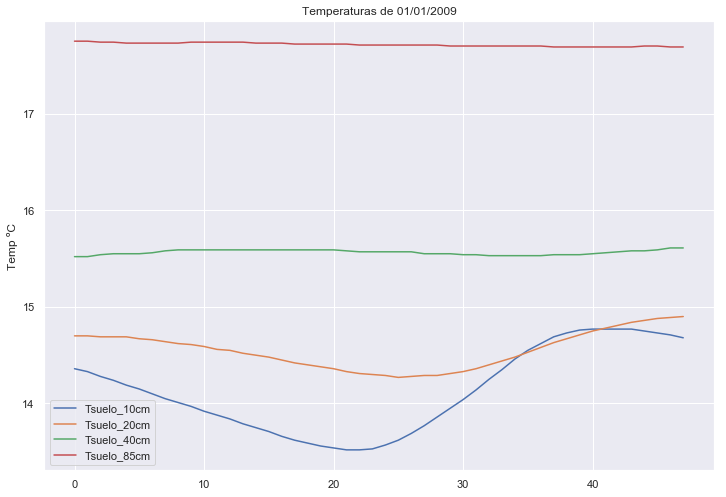

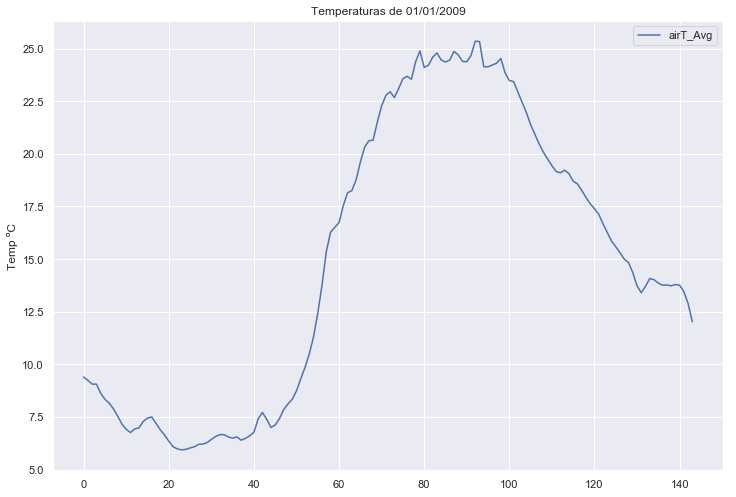

In [132]:
sns.set(rc={'figure.figsize':(12,8.27)})

fig=plt.figure(); df2.plot(); plt.legend(loc='best')
plt.title("Temperaturas de 01/01/2009")
plt.ylabel("Temp ºC")
fig=plt.figure(); df["airT_Avg"].plot(); plt.legend(loc='best')
plt.title("Temperaturas de 01/01/2009")
plt.ylabel("Temp ºC")
plt.grid(True)

<Figure size 864x595.44 with 0 Axes>

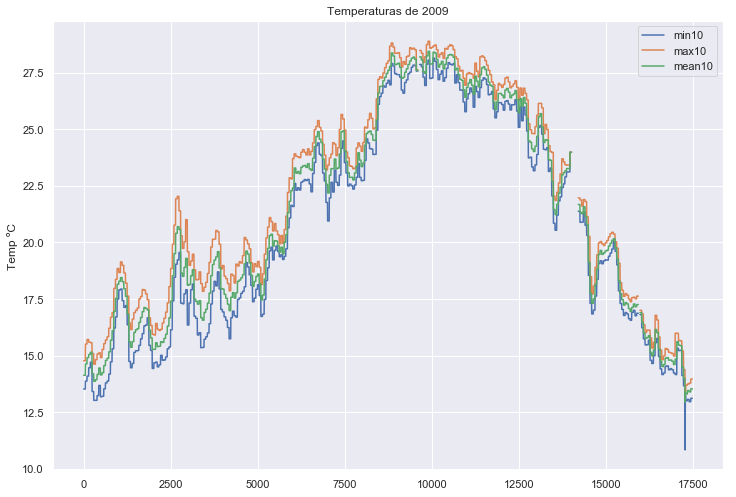

<Figure size 864x595.44 with 0 Axes>

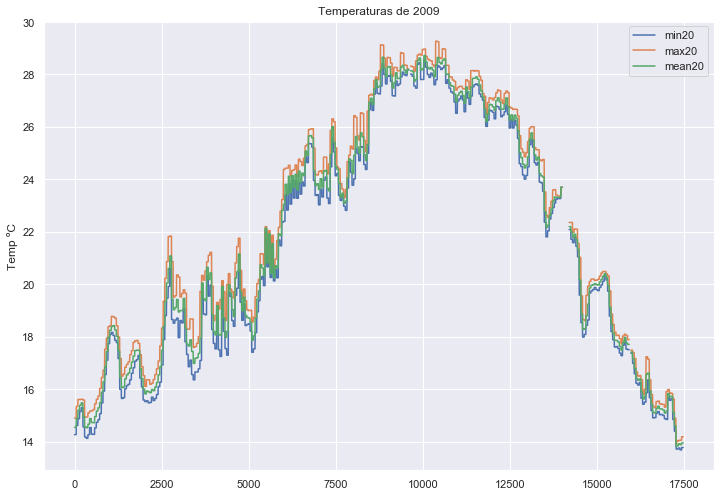

<Figure size 864x595.44 with 0 Axes>

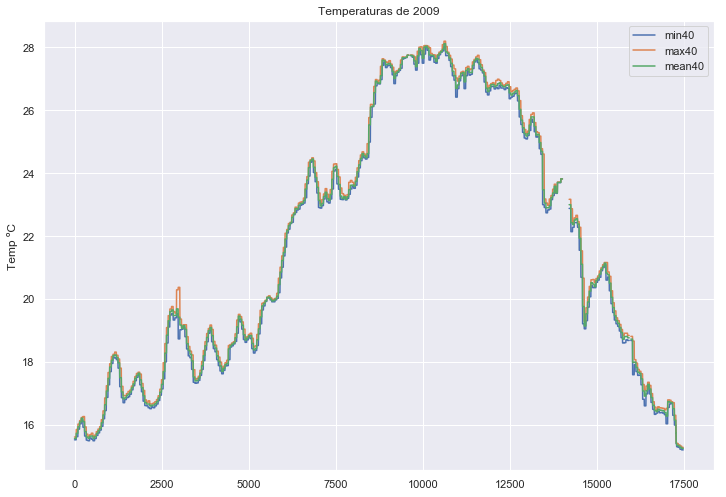

<Figure size 864x595.44 with 0 Axes>

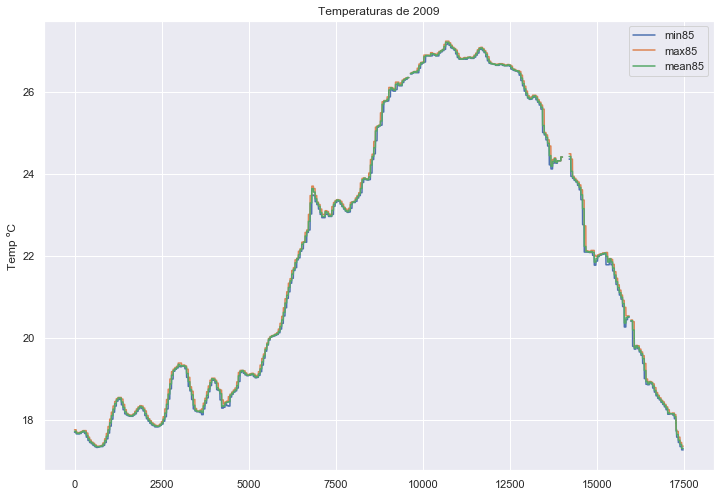

<Figure size 864x595.44 with 0 Axes>

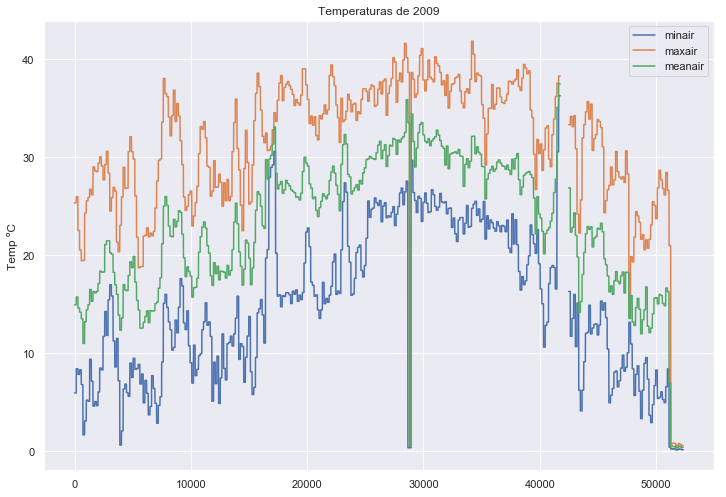

In [136]:
df3=pd.DataFrame()
df4=pd.DataFrame()
df3["MIN"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_10cm"].transform("min")
df3["MAX"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_10cm"].transform("max")
df3["MEAN"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_10cm"].transform("mean")
df4["min10"]=df3.MIN
df4["max10"]=df3.MAX
df4["mean10"]=df3.MEAN

fig=plt.figure(); df4.plot(); plt.legend(loc='best')
plt.title("Temperaturas de 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

df4=pd.DataFrame()
df3=pd.DataFrame()

df3["MIN"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_20cm"].transform("min")
df3["MAX"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_20cm"].transform("max")
df3["MEAN"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_20cm"].transform("mean")
df4["min20"]=df3.MIN
df4["max20"]=df3.MAX
df4["mean20"]=df3.MEAN

fig=plt.figure(); df4.plot(); plt.legend(loc='best')
plt.title("Temperaturas de 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

df4=pd.DataFrame()
df3=pd.DataFrame()

df3["MIN"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_40cm"].transform("min")
df3["MAX"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_40cm"].transform("max")
df3["MEAN"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_40cm"].transform("mean")
df4["min40"]=df3.MIN
df4["max40"]=df3.MAX
df4["mean40"]=df3.MEAN

fig=plt.figure(); df4.plot(); plt.legend(loc='best')
plt.title("Temperaturas de 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

df4=pd.DataFrame()
df3=pd.DataFrame()

df3["MIN"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_85cm"].transform("min")
df3["MAX"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_85cm"].transform("max")
df3["MEAN"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_85cm"].transform("mean")
df4["min85"]=df3.MIN
df4["max85"]=df3.MAX
df4["mean85"]=df3.MEAN

fig=plt.figure(); df4.plot(); plt.legend(loc='best')
plt.title("Temperaturas de 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

df4=pd.DataFrame()
df3=pd.DataFrame()

df["airT_Avg"]
df3["MIN"]=meteo.groupby(["DATE"])["airT_Avg"].transform("min")
df3["MAX"]=meteo.groupby(["DATE"])["airT_Avg"].transform("max")
df3["MEAN"]=meteo.groupby(["DATE"])["airT_Avg"].transform("mean")
df4["minair"]=df3.MIN
df4["maxair"]=df3.MAX
df4["meanair"]=df3.MEAN

fig=plt.figure(); df4.plot(); plt.legend(loc='best')
plt.title("Temperaturas de 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

df4=pd.DataFrame()
df3=pd.DataFrame()

<Figure size 864x595.44 with 0 Axes>

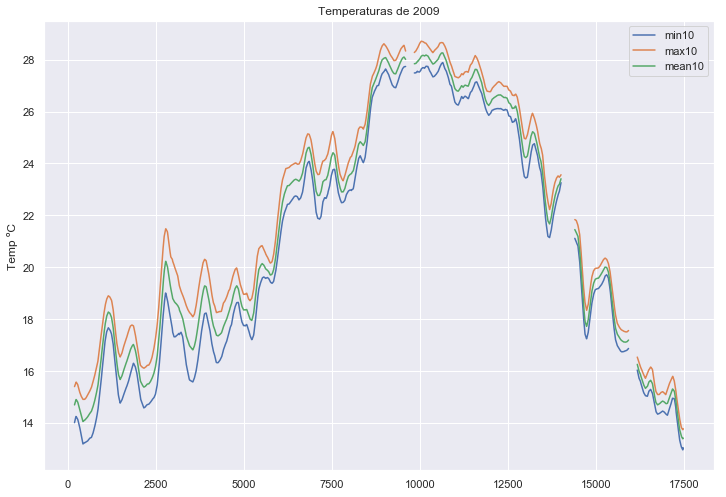

<Figure size 864x595.44 with 0 Axes>

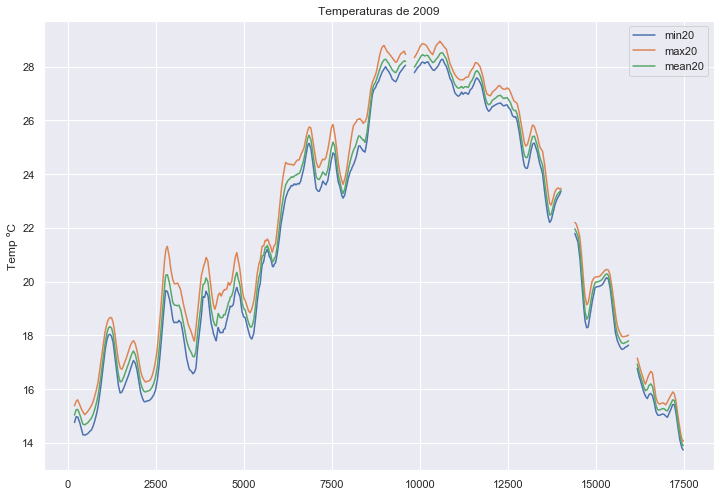

<Figure size 864x595.44 with 0 Axes>

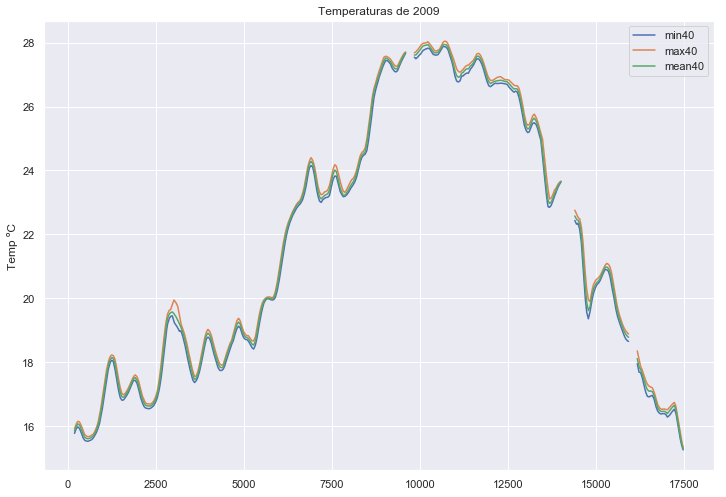

<Figure size 864x595.44 with 0 Axes>

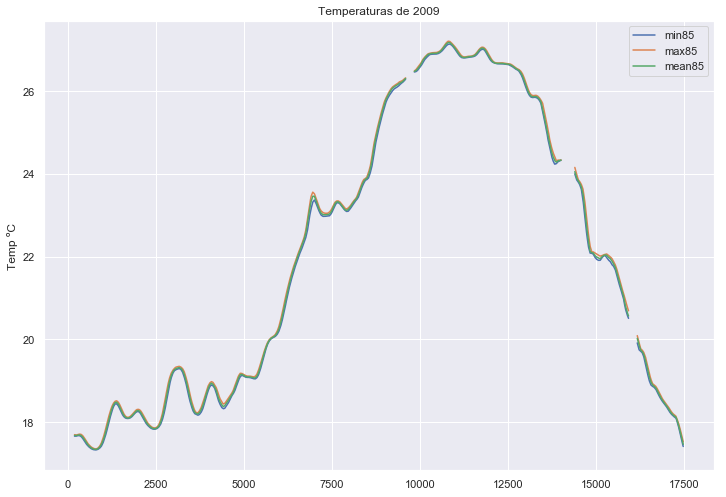

<Figure size 864x595.44 with 0 Axes>

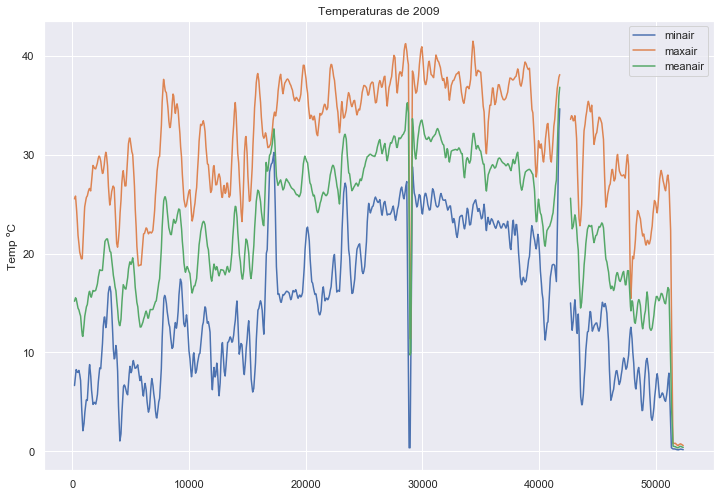

In [149]:
df3=pd.DataFrame()
df4=pd.DataFrame()
df3["MIN"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_10cm"].transform("min")
df3["MAX"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_10cm"].transform("max")
df3["MEAN"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_10cm"].transform("mean")
df4["min10"]=df3.MIN.rolling(200).mean()
df4["max10"]=df3.MAX.rolling(200).mean()
df4["mean10"]=df3.MEAN.rolling(200).mean()

fig=plt.figure(); df4.plot(); plt.legend(loc='best')
plt.title("Temperaturas de 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

df4=pd.DataFrame()
df3=pd.DataFrame()

df3["MIN"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_20cm"].transform("min")
df3["MAX"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_20cm"].transform("max")
df3["MEAN"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_20cm"].transform("mean")
df4["min20"]=df3.MIN.rolling(200).mean()
df4["max20"]=df3.MAX.rolling(200).mean()
df4["mean20"]=df3.MEAN.rolling(200).mean()

fig=plt.figure(); df4.plot(); plt.legend(loc='best')
plt.title("Temperaturas de 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

df4=pd.DataFrame()
df3=pd.DataFrame()

df3["MIN"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_40cm"].transform("min")
df3["MAX"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_40cm"].transform("max")
df3["MEAN"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_40cm"].transform("mean")
df4["min40"]=df3.MIN.rolling(200).mean()
df4["max40"]=df3.MAX.rolling(200).mean()
df4["mean40"]=df3.MEAN.rolling(200).mean()

fig=plt.figure(); df4.plot(); plt.legend(loc='best')
plt.title("Temperaturas de 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

df4=pd.DataFrame()
df3=pd.DataFrame()

df3["MIN"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_85cm"].transform("min")
df3["MAX"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_85cm"].transform("max")
df3["MEAN"]=soil.groupby(["3 Day_RTM  L"])["Tsuelo_85cm"].transform("mean")
df4["min85"]=df3.MIN.rolling(200).mean()
df4["max85"]=df3.MAX.rolling(200).mean()
df4["mean85"]=df3.MEAN.rolling(200).mean()

fig=plt.figure(); df4.plot(); plt.legend(loc='best')
plt.title("Temperaturas de 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

df4=pd.DataFrame()
df3=pd.DataFrame()

df["airT_Avg"]
df3["MIN"]=meteo.groupby(["DATE"])["airT_Avg"].transform("min")
df3["MAX"]=meteo.groupby(["DATE"])["airT_Avg"].transform("max")
df3["MEAN"]=meteo.groupby(["DATE"])["airT_Avg"].transform("mean")
df4["minair"]=df3.MIN.rolling(200).mean()
df4["maxair"]=df3.MAX.rolling(200).mean()
df4["meanair"]=df3.MEAN.rolling(200).mean()

fig=plt.figure(); df4.plot(); plt.legend(loc='best')
plt.title("Temperaturas de 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

df4=pd.DataFrame()
df3=pd.DataFrame()